# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure for finding the optimal value of the parameter(s) of a data model given data work? 

2. What are good working definitions for the likelihood and prior? 

*A function of the parameter $\theta$ of a data model $f_\theta(x_i)$ which defines the value of $\prod_{i=1}^n f_\theta(x_i)$ the (joint) density (or probability) for the observed continuous (or discrete) data $x$ at the value $\theta$.*

*A prior is our beliefs about the possible values of parameters, most likely expressed as a density or probability mass function* (since this provides a most expeditious language to express these beliefs).*

<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?

*Nothing: the data model and the experiment together dictate the parameters of interest; ny prior beliefs about the parameters is then expressed; then data is collected and the posterior updated; this encodes our updated beliefs from which posterior belief statements may be made.*

4. What is "certainty" or "level of belief" in how do you express it?

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution 
2. Express this statement as an expectation with $f(x)$ the beta density in question 


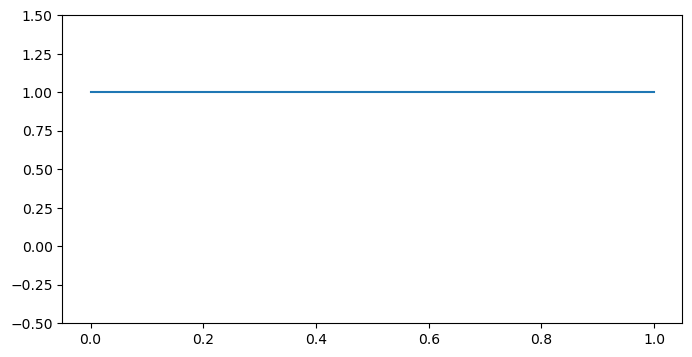

In [1]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt

alpha,beta = 1,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.figure(figsize=(8,4)); plt.ylim([-0.5,1.5])
plt.plot(parameter_domain, prior.pdf(parameter_domain));

In [48]:
prior.cdf(.2)

0.2

In [7]:
m = 10000
(prior.rvs(m)<0.2).mean()


0.02

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


0.313 0.014663935351739656 0.32157197000000004


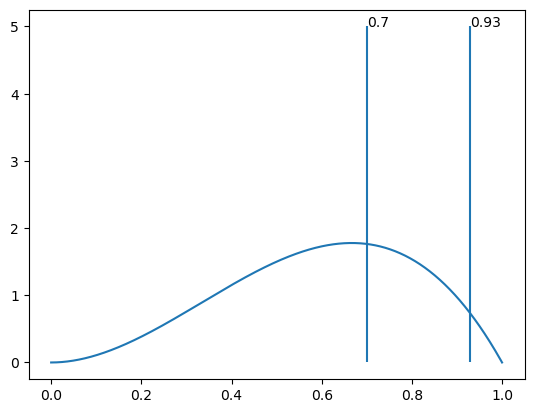

In [118]:
# This is the (reorganized) code I produced throughout the lecture

alpha,beta = 3,2 # arbitrary
a,b = .7,.93  # arbitrary
my_beta = stats.beta(alpha,beta)

u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

m = 1000  # Monte Carlo samples
x = my_beta.rvs(m) 

in_interval = (x >= a) & (x <= b)  # 0/1 outcomes
print(in_interval.mean(),  # an average!
      # so it has a standard error...
      in_interval.std()/m**0.5,  # m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))


# Diversion 1: Likelihoods

---


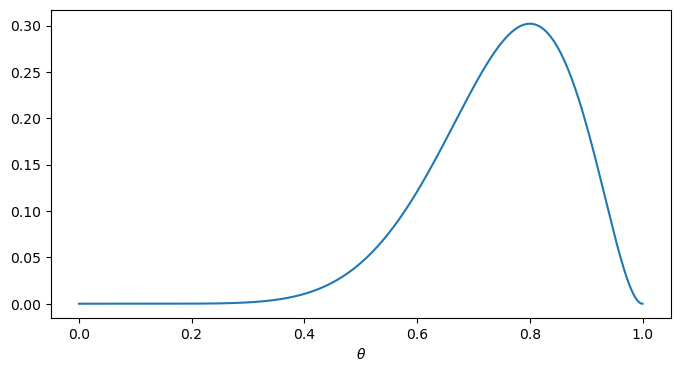

In [33]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom(n=n,p=theta).pmf(x)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


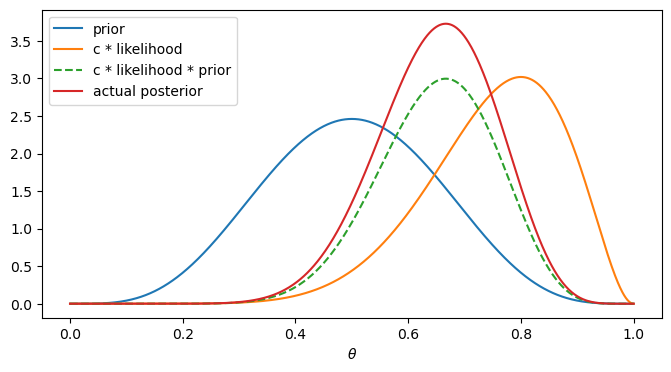

In [102]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1001)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom(n,p=p).pmf(x)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c * likelihood')
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq \theta \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


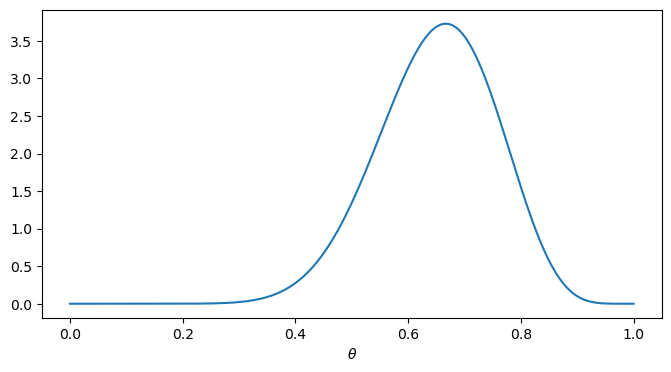

In [4]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


In [ ]:
# Same (reorganized) code I produced throughout the lecture
# with the following change

#alpha,beta = 3,2 # arbitrary
#a,b = .7,.93  # arbitrary
#my_beta = stats.beta(alpha,beta)
n,x = 10,8
my_beta = stats.beta(alpha+x,beta+n-x)
a,b = my_beta.ppf(.025),my_beta.ppf(.975)

u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

m = 1000  # Monte Carlo samples
x = my_beta.rvs(m) 

in_interval = (x >= a) & (x <= b)  # 0/1 outcomes
print(in_interval.mean(), 
      in_interval.std()/m**0.5,  # m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))


In [103]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]
# my_beta.ppf(.025),my_beta.ppf(.975)  # truth

(0.43876120355281634, 0.8383837760707079)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

In [104]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[int(m/40)]).mean()

0.025

In [112]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[-int(m/40)]).mean()

0.975

In [117]:
# But these choices are Monte Carlo estimates 
# with standard error given by
(posterior_m < sorted(posterior_m)[int(m/40)]).std()/m**0.5

0.004937104414532875

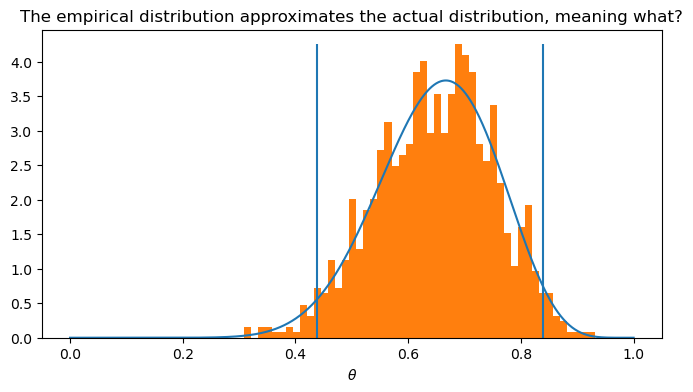

In [119]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

# Uncommenting this to see the Bayesian Credible interval
#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max()); 

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
6. Why might this be useful?
7. How is this different than calculating probabilities from mathematical definitions of a distribution?
8. Why is Bayesian inference different from Frequentist inference?


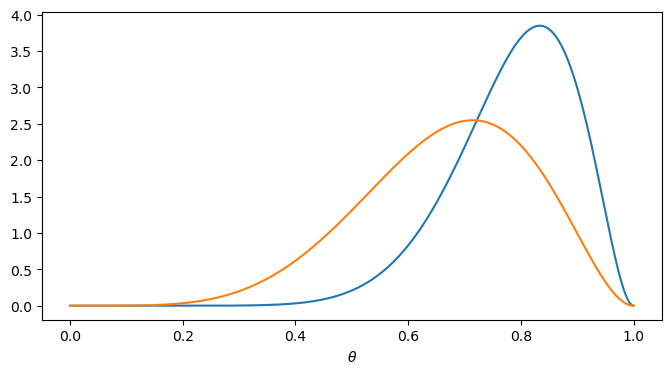

In [10]:
# Let's compare two distributions...

alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8  
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3  
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$?

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

# Answers

#### NOTE: My notebook on U of T's Jupyterhub got corrupted, this was the best I could do with the remaining time.

---

Q1:

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} \propto \binom{n}{x}\theta^x(1-\theta)^{n-x} \cdot \frac{1}{101}\\
&&&\quad\quad\quad\quad\quad\quad\; \propto \theta^x(1-\theta)^{n-x}\\
&&&\quad\quad\quad\quad\; \text{Which is a discrete Beta distribution with parameters} \hspace{1cm} \alpha = x + 1 \hspace{1cm} \beta = n - x + 1\\
\end{align*}

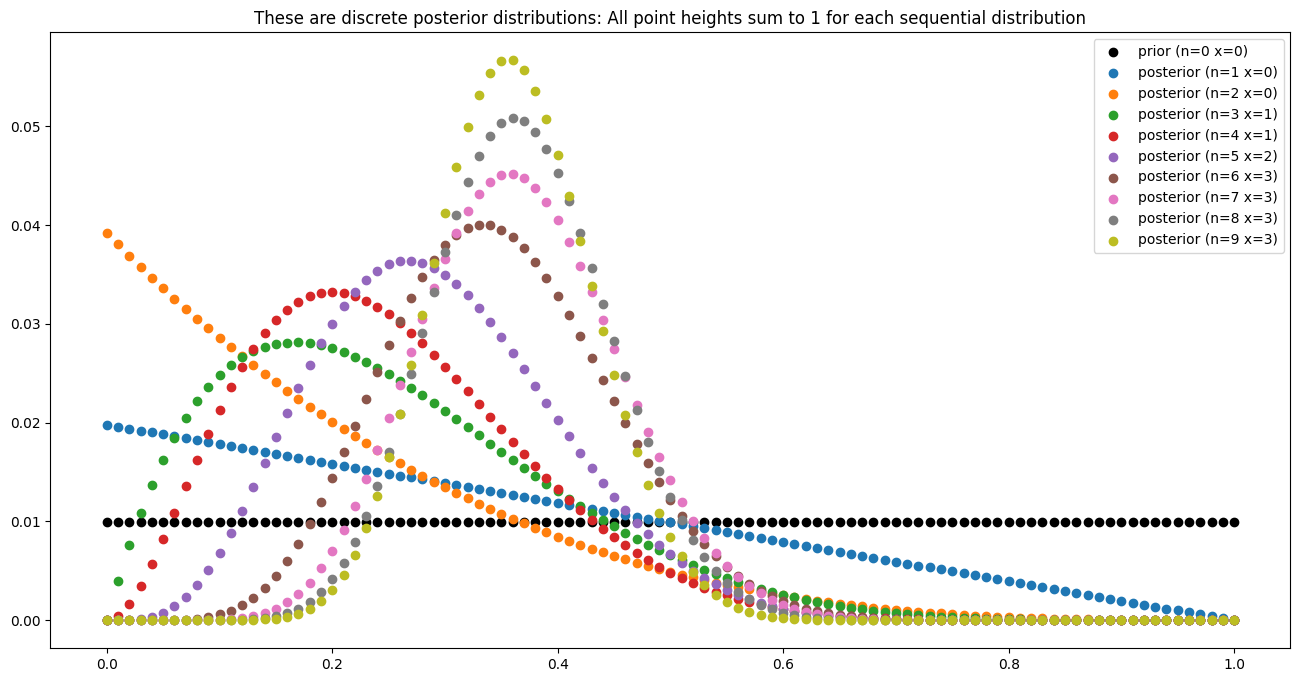

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

prior = np.ones(101) / 101 
parameter_domain = np.linspace(0, 1, 101) 

n, x = 0, 0

observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]

plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')

plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    # Batch updates for the Binomial distribution parameters.
    n += 1
    x += observation
    
    # Computing the Binomial likelihood.
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    
    # Updating the posterior.
    posterior = prior * likelihood
    
    # Ensure that all point height sum to 1.
    posterior /= posterior.sum()
    
    # Plotting the current iteration of the posterior.
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")
    
    # Setting the computed posterior as the new prior.
    prior = posterior

plt.legend()
plt.show()

Q2:

We consider $\theta_1^{true} < \theta_2^{true}$ with the posteriors

$$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{Beta}(x_j^{(t)}+\alpha_j, n_j^{(t)}-x_j^{(t)}+\beta_j)$$

and implement a Bayesian multi-armed bandit


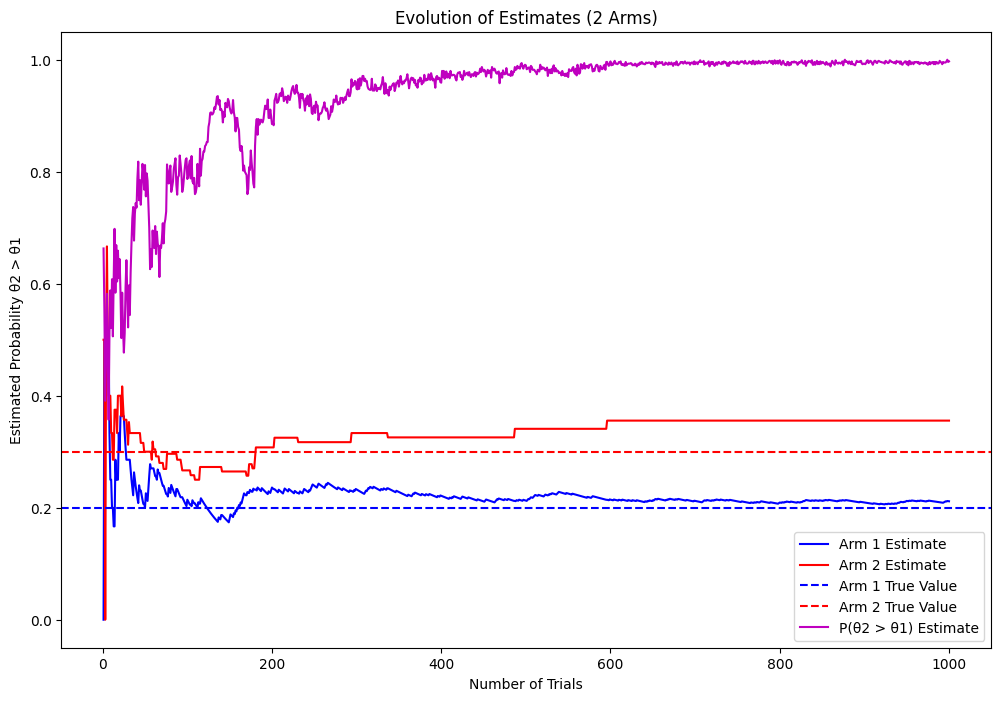

In [29]:
# Set number of time steps.
m = 1000
timesteps = np.linspace(1, m, 1000)

# Initialize true values.
theta1, theta2 = 0.2, 0.3

# Initialize parameters.
alpha1, beta1 = 3, 2
alpha2, beta2, = 3, 2

n1, x1 = 0, 0
n2, x2 = 0, 0

# Initialize parameter posteriors.
theta1_posterior = stats.beta(a=x1 + alpha1, b=n1 - x1 + beta1)
theta2_posterior = stats.beta(a=x2 + alpha2, b=n2 - x2 + beta2)

history = []

# Perform Bayesian multi-armed bandit procedure.
for step in timesteps:
    theta1_posterior = stats.beta(a=x1 + alpha1, b=n1 - x1 + beta1)
    theta2_posterior = stats.beta(a=x2 + alpha2, b=n2 - x2 + beta2)
    
    # Chance of flipping the coin.
    if np.random.rand() < np.mean(theta1_posterior.rvs(size=1000) < theta2_posterior.rvs(1000)):
        
        # Generate an outcome for theta1.
        if np.random.rand() < theta1: 
            x1 += 1
            alpha1 += 1
        else:
            beta1 += 1
            
        n1 += 1
        
    else:        
        
        # Generate an outcome for theta2.
        if np.random.rand() < theta2:
            x2 += 1
            alpha2 += 1
        else:
            beta2 += 1
            
        n2 += 1

    history.append([n1, x1, n2, x2, alpha1, beta1, alpha2, beta2])

estimates = []

# Compute estimates across time.
for params in history:
    theta1_estimate = 0.5
    theta2_estimate = 0.5

    if params[0] > 0:
        theta1_estimate = params[1] / params[0]
    
    if params[2] > 0:
        theta2_estimate = params[3] / params[2]
    
    prob_estimate = np.mean(
        stats.beta.rvs(params[4], params[5], size=1000) < stats.beta.rvs(params[6], params[7], size=1000)
    )
    
    estimates.append([theta1_estimate, theta2_estimate, prob_estimate])

plt.figure(figsize=(12, 8))

# Plotting the estimates of each arm.
plt.plot(timesteps, [*map(lambda estimate: estimate[0], estimates)], 'b-', label='Arm 1 Estimate')
plt.plot(timesteps, [*map(lambda estimate: estimate[1], estimates)], 'r-', label='Arm 2 Estimate')

# Plotting the true values of each arm.
plt.axhline(y=theta1, color='b', linestyle='--', label='Arm 1 True Value')
plt.axhline(y=theta2, color='r', linestyle='--', label='Arm 2 True Value')

# Plotting the estimated probability that theta1 < theta2.
plt.plot(timesteps, [*map(lambda estimate: estimate[2], estimates)], 'm-', label='P(θ2 > θ1) Estimate')

plt.xlabel('Number of Trials')
plt.ylabel('Estimated Probability θ2 > θ1')

plt.title('Evolution of Estimates (2 Arms)')
plt.legend()
plt.show()

Q3:

We extend the implementation of the Bayesian multi-armed bandit to one with three entities. Additionally, a Dirichlet-Multinomial approach is also included.

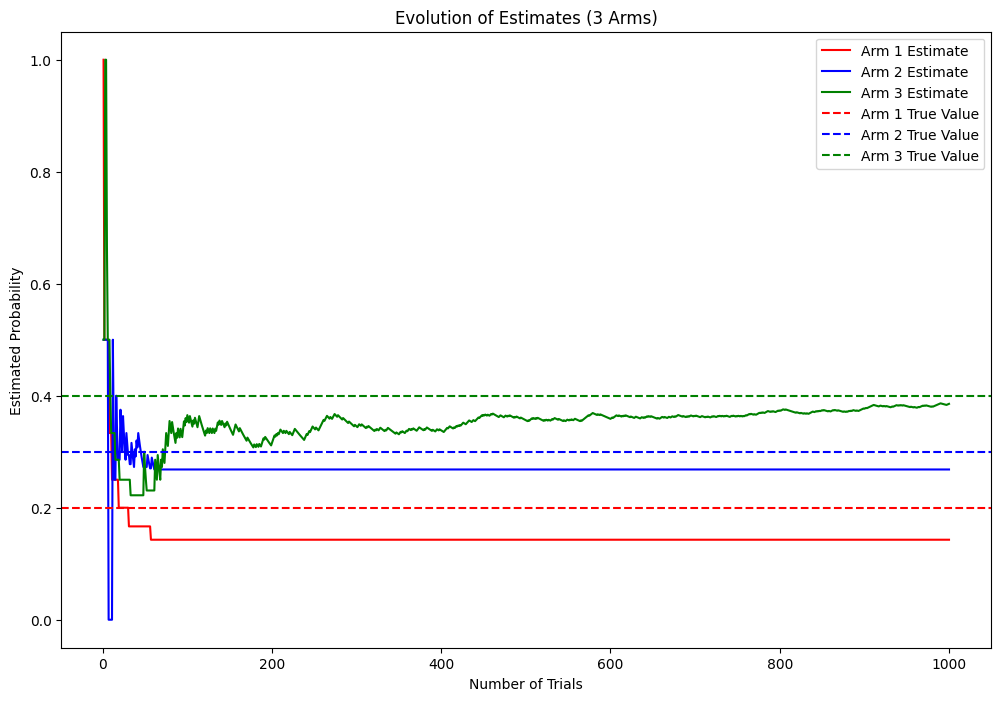

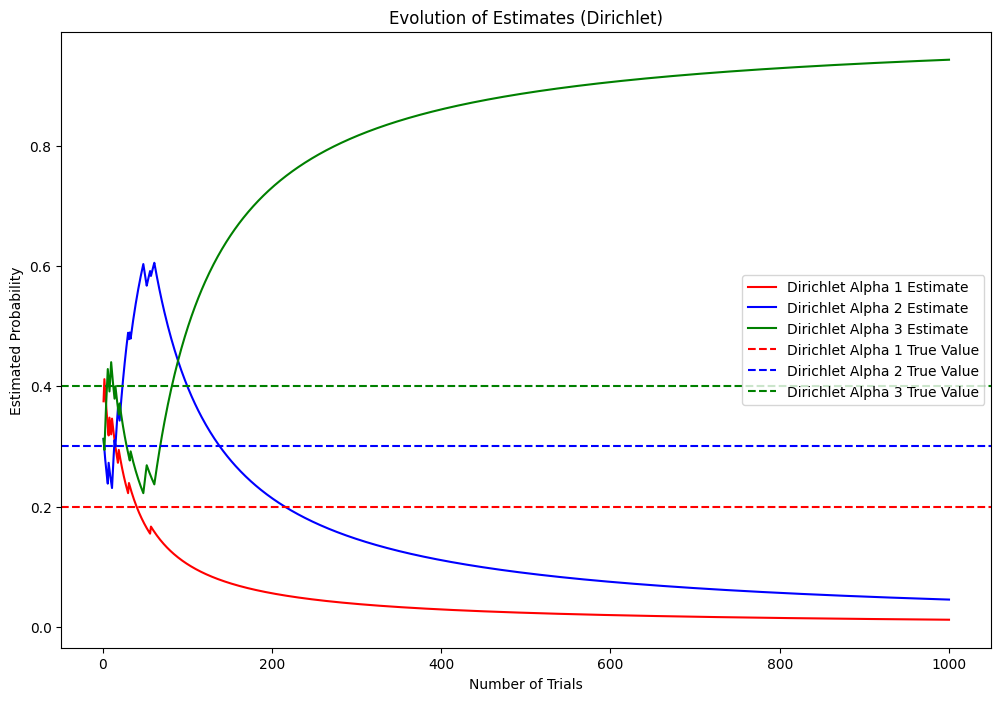

In [37]:
# Set number of time steps.
m = 1000
timesteps = np.linspace(1, m, 1000)

# Initialize true values.
theta1, theta2, theta3 = 0.2, 0.3, 0.4

# Initialize Beta-Binomial parameters.
alpha1, beta1 = 3, 2
alpha2, beta2 = 3, 2
alpha3, beta3 = 3, 2

n1, x1 = 0, 0
n2, x2 = 0, 0
n3, x3 = 0, 0

# Initialize Dirichlet-Multinomial parameters.
dirichlet_alpha = [5.0, 5.0, 5.0]

# Initialize Beta-Binomial parameter posteriors.
theta1_posterior = stats.beta(a=x1 + alpha1, b=n1 - x1 + beta1)
theta2_posterior = stats.beta(a=x2 + alpha2, b=n2 - x2 + beta2)
theta3_posterior = stats.beta(a=x3 + alpha3, b=n3 - x3 + beta3)

# Initialize Dirichlet-Multinomial parameter posteriors.
dirichlet_posterior = stats.dirichlet(alpha=dirichlet_alpha)

history_beta = []
history_dirichlet = []

# Perform Bayesian multi-armed bandit procedure.
for step in timesteps:
    theta1_posterior = stats.beta(a=x1 + alpha1, b=n1 - x1 + beta1)
    theta2_posterior = stats.beta(a=x2 + alpha2, b=n2 - x2 + beta2)
    theta3_posterior = stats.beta(a=x3 + alpha3, b=n3 - x3 + beta3)

    samples = [theta1_posterior.rvs(size=1000), theta2_posterior.rvs(size=1000), theta3_posterior.rvs(size=1000)]
    
    selected = np.argmax([np.mean(sample) for sample in samples])
    
    if selected == 0:
        if np.random.rand() < theta1:
            x1 += 1
            alpha1 += 1
        else:
            beta1 += 1
        n1 += 1
        dirichlet_alpha[0] += 1
        
    elif selected == 1:
        if np.random.rand() < theta2:
            x2 += 1
            alpha2 += 1
        else:
            beta2 += 1
        n2 += 1
        dirichlet_alpha[1] += 1
        
    else:
        if np.random.rand() < theta3:
            x3 += 1
            alpha3 += 1
        else:
            beta3 += 1
        n3 += 1
        dirichlet_alpha[2] += 1
    
    history_beta.append([n1, x1, n2, x2, n3, x3, alpha1, beta1, alpha2, beta2, alpha3, beta3])
    history_dirichlet.append([dirichlet_alpha[0], dirichlet_alpha[1], dirichlet_alpha[2]])

beta_estimates, dirichlet_estimates = [], []

# Compute estimates across time.
for beta_params, dirichlet_params in zip(history_beta, history_dirichlet):
    theta1_estimate = 0.5
    theta2_estimate = 0.5
    theta3_estimate = 0.5

    if beta_params[0] > 0:
        theta1_estimate = beta_params[1] / beta_params[0]
    
    if beta_params[2] > 0:
        theta2_estimate = beta_params[3] / beta_params[2]
    
    if beta_params[4] > 0:
        theta3_estimate = beta_params[5] / beta_params[4]
    
    beta_estimates.append([theta1_estimate, theta2_estimate, theta3_estimate])
    dirichlet_estimates.append([
            dirichlet_params[0] / sum(dirichlet_params),
            dirichlet_params[1] / sum(dirichlet_params),
            dirichlet_params[2] / sum(dirichlet_params)
        ])

plt.figure(figsize=(12, 8))

# Plotting the estimates of each arm.
plt.plot(timesteps, [*map(lambda beta_estimate: beta_estimate[0], beta_estimates)], 'r-', label='Arm 1 Estimate')
plt.plot(timesteps, [*map(lambda beta_estimate: beta_estimate[1], beta_estimates)], 'b-', label='Arm 2 Estimate')
plt.plot(timesteps, [*map(lambda beta_estimate: beta_estimate[2], beta_estimates)], 'g-', label='Arm 3 Estimate')

# Plotting the true values of each arm.
plt.axhline(y=theta1, color='r', linestyle='--', label='Arm 1 True Value')
plt.axhline(y=theta2, color='b', linestyle='--', label='Arm 2 True Value')
plt.axhline(y=theta3, color='g', linestyle='--', label='Arm 3 True Value')

plt.xlabel('Number of Trials')
plt.ylabel('Estimated Probability')

plt.title('Evolution of Estimates (3 Arms)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))

# Plotting the estimates for each parameter.
plt.plot(timesteps, [*map(lambda dirichlet_estimate: dirichlet_estimate[0], dirichlet_estimates)], 'r-', label='Dirichlet Alpha 1 Estimate')
plt.plot(timesteps, [*map(lambda dirichlet_estimate: dirichlet_estimate[1], dirichlet_estimates)], 'b-', label='Dirichlet Alpha 2 Estimate')
plt.plot(timesteps, [*map(lambda dirichlet_estimate: dirichlet_estimate[2], dirichlet_estimates)], 'g-', label='Dirichlet Alpha 3 Estimate')

# Plotting the true values of each arm.
plt.axhline(y=theta1, color='r', linestyle='--', label='Dirichlet Alpha 1 True Value')
plt.axhline(y=theta2, color='b', linestyle='--', label='Dirichlet Alpha 2 True Value')
plt.axhline(y=theta3, color='g', linestyle='--', label='Dirichlet Alpha 3 True Value')

plt.xlabel('Number of Trials')
plt.ylabel('Estimated Probability')

plt.title('Evolution of Estimates (Dirichlet)')
plt.legend()
plt.show()

In our examples, we treat each of our entities as independant and so the Beta-Binomial approach may be more suitable.

We can consider one of the most popular real-world A/B scenarios: marketing. Suppose a company is attempting to optimize conversions via specific targetted marketing towards three different groups (or demographics). In this case, the outcome of whether or not a conversion in a group occured is binary. Using a Dirichlet-Multinomial approach would consider each group jointly. Instead, a Beta-Binomial model may be better suited as it can optimize an arm for each group independantly.